In [19]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='s8HpZqqJ-2zjY_b0Sr35hu4t0n04nDM4IXfZUjRK6R-z',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'customerpurchasebehaviouranalysis-donotdelete-pr-fzjqbmr6ieqpo1'
object_key = 'customer_purchase_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(10)



,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
5,66,1,37758.117475,14,4,17.827493,0,2,0
6,39,1,126883.385286,16,3,42.085384,1,4,1
7,64,1,39707.359724,13,2,17.190292,1,0,0
8,43,0,102797.301269,20,1,6.023475,0,3,0
9,20,1,63854.921080,16,0,38.572466,0,5,1


In [3]:
df_1.shape


(1500, 9)

In [4]:
df_1.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
5,66,1,37758.117475,14,4,17.827493,0,2,0
6,39,1,126883.385286,16,3,42.085384,1,4,1
7,64,1,39707.359724,13,2,17.190292,1,0,0
8,43,0,102797.301269,20,1,6.023475,0,3,0
9,20,1,63854.921080,16,0,38.572466,0,5,1


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [6]:
pd.isnull(df_1)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False,False,False


In [7]:
df_1.dropna(inplace=True)

In [8]:
print(df_1)

      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0      40       1   66120.267939                  8                0   
1      20       1   23579.773583                  4                2   
2      27       1  127821.306432                 11                2   
3      24       1  137798.623120                 19                3   
4      31       1   99300.964220                 19                1   
...   ...     ...            ...                ...              ...   
1495   39       1   65048.141834                 13                0   
1496   67       1   28775.331069                 18                2   
1497   40       1   57363.247541                  7                4   
1498   63       0  134021.775532                 16                2   
1499   50       0   52625.665974                 13                0   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0              30.568601               0                 5

In [10]:
#intialize list of values
data_test=[[56,9],[60,7],[34, ],[48,6]]
#Create the pandas dataframe using list
df_1_test=pd.DataFrame(data_test,columns=['Age','NumberOfPurchases'])
df_1_test

,Age,NumberOfPurchases
0,56,9.0
1,60,7.0
2,34,NaN
3,48,6.0


In [11]:
df_1_test.dropna()# here dropna used for null values removal

,Age,NumberOfPurchases
0,56,9.0
1,60,7.0
3,48,6.0


# both are same

df_1_test.dropna(inplace=True)df_1_test=df_1_test.dropna()

In [13]:
#change data type
df_1['NumberOfPurchases']=df_1['NumberOfPurchases'].astype('int')

In [14]:
df_1['NumberOfPurchases'].dtypes

dtype('int64')

In [15]:
df_1.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [16]:
df_1.rename(columns={'NumberOfPurchases':'Sales'})

,Age,Gender,AnnualIncome,Sales,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [17]:
df_1.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


# #Exploratory Data Analysis

Gender

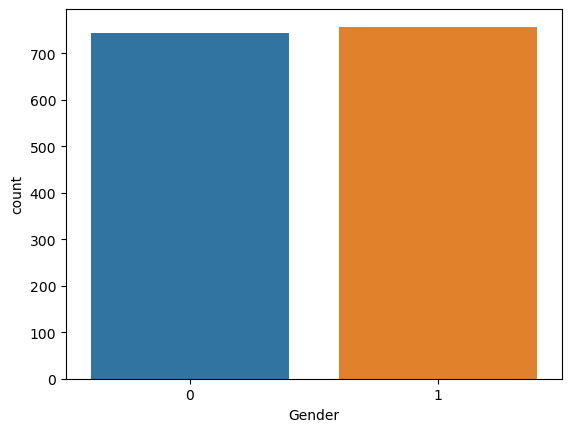

In [21]:
ax=sns.countplot(x='Gender',data=df_1)

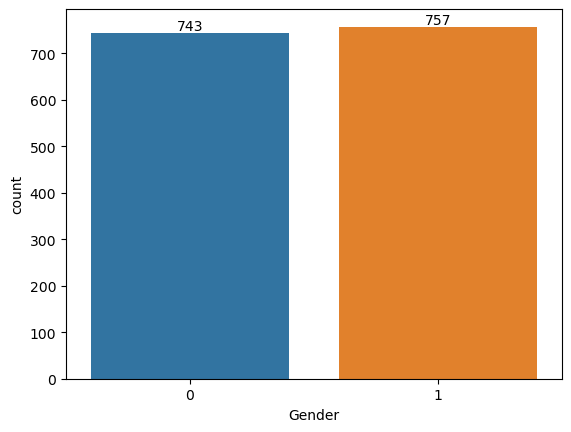

In [22]:
ax=sns.countplot(x='Gender',data=df_1)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='NumberOfPurchases'>

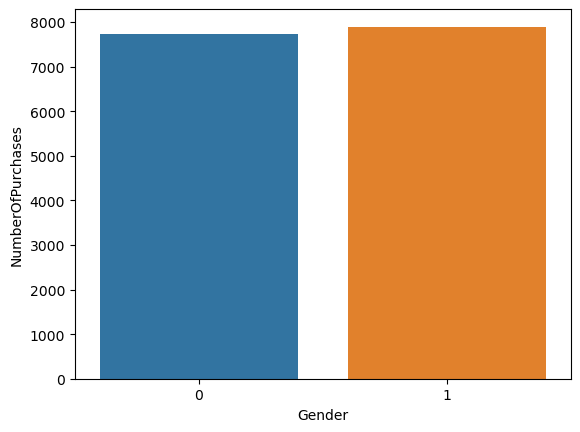

In [25]:
sales_gen=df_1.groupby(['Gender'],as_index=False)['NumberOfPurchases'].sum().sort_values(by='NumberOfPurchases',ascending=False)
sns.barplot(x='Gender',y='NumberOfPurchases',data=sales_gen)

In [27]:
df_1.groupby(['Gender'],as_index=False)['NumberOfPurchases'].sum().sort_values(by='NumberOfPurchases',ascending=False)

,Gender,NumberOfPurchases
1,1,7894
0,0,7736


# Age

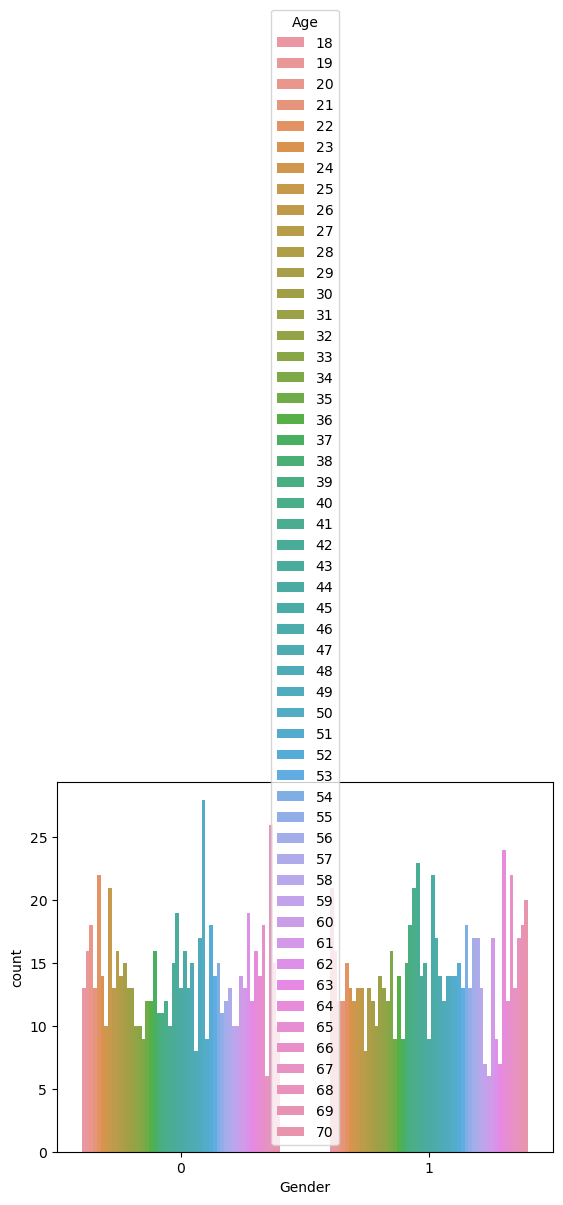

In [36]:
ax=sns.countplot(data=df_1,x='Gender',hue='Age')